# Purpose
The purpose of this notebook will be to perform exploratory data analysis on the JOLTS dataset. This is the second step in the phase of our project, and will precede the ML portion.

# Goals
The goals of this EDA process are to figure out which features will be useful, how we can determine this "usefulness," and what we can do in order to get the results we need for this project.

## Step 1: Import Statements and Data Loading

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
jolts = pd.read_csv('jolts_formatted.csv')

## Step 2: Separation of summation data and regular data

In [82]:
# Step 0: Ensure 'date' column is still string-type (or re-cast it)
jolts['date'] = jolts['date'].astype(str)

# Step 1: Extract rows with month 13 (before any datetime conversion)
yearly_sums = jolts[jolts['date'].str.contains(r'-13-', na=False)].copy()

# Step 2: Keep only rows with valid months (1–12)
jolts = jolts[~jolts['date'].str.contains(r'-13-', na=False)].copy()

# Step 3: Convert cleaned 'date' column to datetime
jolts['date'] = pd.to_datetime(jolts['date'])

jolts_percents = jolts.loc[:, ['date'] + jolts.columns[jolts.columns.str.contains('Rate in')].tolist()].copy()
jolts_counts = jolts.loc[:, ['date'] + jolts.columns[jolts.columns.str.contains('Level in')].tolist()].copy()

jolts_percents.to_csv('jolts_percents.csv', index=False)
jolts_counts.to_csv('jolts_counts.csv', index=False)

## Step 2.5: Convert the date in yearly_sums from YYYY-MM-DD to YYYY

In [83]:
# Convert to string if needed
yearly_sums['date'] = yearly_sums['date'].astype(str)

# Extract the year portion
yearly_sums['date'] = yearly_sums['date'].str.slice(0, 4)

yearly_sums.to_csv('jolts_yearly_sums.csv', index=False)

## Step 4: Preliminary Broad Exploration into the Data

In [84]:
jolts_percents.head()

,date,"Hires: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Job Openings: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Layoffs and Discharges: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Other separations: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Quits: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Total Separations: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","UO\tUnemployed persons per job opening ratio: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Hires: Total nonfarm in Alabama - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Job Openings: Total nonfarm in Alabama - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)",...,"Layoffs and Discharges: State and local government education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Other separations: State and local government education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Quits: State and local government education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Total Separations: State and local government education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Hires: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Job Openings: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Layoffs and Discharges: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Other separations: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Quits: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Total Separations: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)"
0,2000-12-01,4.1,3.7,1.5,0.3,2.2,3.9,1.1,4.0,3.4,...,0.4,0.1,0.5,1.0,1.2,3.1,0.5,0.2,0.6,1.3
1,2001-01-01,4.3,3.8,1.7,0.3,2.4,4.4,1.2,4.2,3.5,...,0.2,0.2,0.6,1.0,1.5,2.9,0.4,0.3,0.7,1.3
2,2001-02-01,4.0,3.7,1.4,0.2,2.3,3.9,1.2,3.5,3.5,...,0.2,0.1,0.4,0.7,1.5,2.8,0.3,0.2,0.8,1.3
3,2001-03-01,4.2,3.5,1.6,0.3,2.3,4.2,1.3,4.4,2.9,...,0.1,0.1,0.4,0.7,1.5,2.7,0.3,0.2,0.8,1.3
4,2001-04-01,3.9,3.4,1.4,0.3,2.4,4.1,1.4,4.5,3.3,...,0.1,0.1,0.3,0.6,1.7,3.2,0.6,0.3,0.7,1.5


In [85]:
jolts_counts.head()

,date,"Hires: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Job Openings: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Layoffs and Discharges: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Other separations: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Quits: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Total Separations: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Hires: Total nonfarm in Alabama - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Job Openings: Total nonfarm in Alabama - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Layoffs and Discharges: Total nonfarm in Alabama - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)",...,"Layoffs and Discharges: State and local government education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Other separations: State and local government education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Quits: State and local government education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Total Separations: State and local government education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Hires: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Job Openings: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Layoffs and Discharges: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Other separations: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Quits: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Total Separations: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)"
0,2000-12-01,5426.0,5088.0,2018.0,340.0,2882.0,5240.0,78.0,68.0,24.0,...,42.0,11.0,45.0,98.0,105.0,277.0,44.0,19.0,52.0,115.0
1,2001-01-01,5722.0,5234.0,2220.0,377.0,3245.0,5842.0,81.0,70.0,25.0,...,22.0,16.0,58.0,96.0,127.0,255.0,33.0,23.0,56.0,112.0
2,2001-02-01,5303.0,5097.0,1855.0,323.0,3053.0,5231.0,67.0,70.0,28.0,...,19.0,11.0,40.0,70.0,124.0,242.0,27.0,16.0,72.0,115.0
3,2001-03-01,5528.0,4762.0,2133.0,379.0,3054.0,5566.0,86.0,58.0,32.0,...,13.0,11.0,45.0,69.0,128.0,243.0,26.0,17.0,68.0,111.0
4,2001-04-01,5204.0,4615.0,1883.0,367.0,3163.0,5414.0,86.0,65.0,27.0,...,12.0,12.0,34.0,59.0,143.0,288.0,48.0,22.0,57.0,127.0


In [86]:
print("Jolts Percents Info:")
print(jolts_percents.info())
print("\nJolts Counts Info:")
print(jolts_counts.info())

Jolts Percents Info:
<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 319
Columns: 1019 entries, date to Total Separations: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)
dtypes: datetime64[ns](1), float64(1018)
memory usage: 2.3 MB
None

Jolts Counts Info:
<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 319
Columns: 967 entries, date to Total Separations: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)
dtypes: datetime64[ns](1), float64(966)
memory usage: 2.2 MB
None


In [87]:
jolts_percents.describe(include='all')

,date,"Hires: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Job Openings: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Layoffs and Discharges: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Other separations: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Quits: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Total Separations: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","UO\tUnemployed persons per job opening ratio: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Hires: Total nonfarm in Alabama - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)","Job Openings: Total nonfarm in Alabama - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)",...,"Layoffs and Discharges: State and local government education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Other separations: State and local government education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Quits: State and local government education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Total Separations: State and local government education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Hires: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Job Openings: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Layoffs and Discharges: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Other separations: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Quits: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)","Total Separations: State and local government, excluding education - Rate in Percent, Monthly, Not Seasonally Adjusted (All size classes)"
count,296,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,2013-03-17 00:34:03.243243264,3.692905,3.656757,1.366554,0.242568,2.007770,3.623649,2.056419,3.863851,3.681757,...,0.465203,0.236486,0.741892,1.442905,1.605405,3.183108,0.521622,0.273649,0.762500,1.554054
min,2000-12-01 00:00:00,2.800000,1.700000,0.900000,0.200000,1.200000,3.000000,0.500000,2.600000,1.600000,...,0.100000,0.100000,0.300000,0.500000,0.700000,1.500000,0.200000,0.100000,0.400000,0.900000
25%,2007-01-24 06:00:00,3.400000,2.700000,1.200000,0.200000,1.800000,3.300000,1.000000,3.500000,2.700000,...,0.200000,0.100000,0.400000,0.775000,1.200000,2.300000,0.300000,0.200000,0.600000,1.300000
50%,2013-03-16 12:00:00,3.700000,3.300000,1.300000,0.200000,2.000000,3.600000,1.600000,3.800000,3.300000,...,0.300000,0.200000,0.600000,1.100000,1.500000,2.800000,0.400000,0.300000,0.700000,1.400000
75%,2019-05-08 18:00:00,3.900000,4.400000,1.500000,0.300000,2.200000,3.800000,2.600000,4.200000,4.400000,...,0.700000,0.300000,1.000000,2.125000,1.800000,3.800000,0.600000,0.300000,0.900000,1.700000
max,2025-07-01 00:00:00,6.100000,7.400000,8.600000,0.300000,3.000000,10.800000,6.500000,5.600000,7.600000,...,1.700000,1.000000,2.100000,4.700000,3.200000,6.500000,1.600000,0.400000,1.400000,3.200000
std,NaN,0.387671,1.274158,0.575249,0.049528,0.362253,0.588749,1.353499,0.569160,1.324939,...,0.346173,0.186547,0.415548,0.876289,0.516610,1.214483,0.310176,0.064689,0.213555,0.434664


In [88]:
jolts_counts.describe(include='all')

,date,"Hires: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Job Openings: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Layoffs and Discharges: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Other separations: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Quits: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Total Separations: Total nonfarm - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Hires: Total nonfarm in Alabama - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Job Openings: Total nonfarm in Alabama - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)","Layoffs and Discharges: Total nonfarm in Alabama - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)",...,"Layoffs and Discharges: State and local government education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Other separations: State and local government education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Quits: State and local government education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Total Separations: State and local government education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Hires: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Job Openings: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Layoffs and Discharges: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Other separations: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Quits: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)","Total Separations: State and local government, excluding education - Level in Thousands, Monthly, Not Seasonally Adjusted (All size classes)"
count,296,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,2013-03-17 00:34:03.243243264,5192.918919,5455.800676,1910.172297,343.631757,2843.925676,5097.756757,77.145270,77.503378,26.010135,...,45.956081,23.442568,74.307432,143.75000,146.182432,301.489865,47.584459,24.621622,69.314189,141.537162
min,2000-12-01 00:00:00,3639.000000,2232.000000,1285.000000,248.000000,1555.000000,3884.000000,49.000000,32.000000,14.000000,...,11.000000,6.000000,27.000000,50.00000,68.000000,137.000000,16.000000,14.000000,34.000000,79.000000
25%,2007-01-24 06:00:00,4703.500000,3728.750000,1745.000000,320.750000,2400.750000,4719.500000,68.000000,54.000000,22.000000,...,20.000000,12.000000,45.000000,80.75000,112.000000,213.000000,29.000000,21.000000,54.000000,114.000000
50%,2013-03-16 12:00:00,5225.000000,4654.500000,1844.500000,342.000000,2869.000000,5109.000000,78.000000,67.500000,25.000000,...,32.000000,17.000000,60.000000,111.50000,133.500000,260.000000,38.500000,24.000000,66.500000,130.000000
75%,2019-05-08 18:00:00,5574.000000,6978.500000,1967.000000,367.250000,3227.750000,5383.500000,85.000000,95.250000,29.000000,...,65.250000,29.000000,96.000000,203.00000,164.000000,356.500000,53.500000,28.000000,81.000000,154.000000
max,2025-07-01 00:00:00,8133.000000,12134.000000,12985.000000,435.000000,4499.000000,16275.000000,113.000000,174.000000,91.000000,...,159.000000,97.000000,208.000000,443.00000,295.000000,661.000000,150.000000,39.000000,132.000000,293.000000
std,NaN,690.640646,2302.694340,802.503173,33.336541,640.213562,9

In [89]:
print(jolts.shape)
print(jolts_percents.shape)
print(jolts_counts.shape)

(296, 1986)
(296, 1019)
(296, 967)


In [90]:
jolts.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

This observation here indicates that there are no null values in the JOLTS dataset after placing the 13th month date into it's own dataset. This will make the data very nice to work with.

### Visualize Distributions -- Plot Histograms by Data Element
This way, we won't have an overwhelmed histogram

In [91]:
data_elements = ['Hires', 'Quits', 'Total Separations', 'Job Openings', 'Other Separations', 'Layoffs and Discharges', 'Unemployed persons per job opening ratio', 'Unemployment Rate']

In [92]:
count_columns_by_element = {element: [col for col in jolts_counts.columns if element in col and not 'Not Seasonally Adjusted' in col] for element in data_elements}
count_columns_by_element.keys()
count_columns_by_element['Hires']

percent_columns_by_element = {element: [col for col in jolts_percents.columns if element in col and not 'Not Seasonally Adjusted' in col] for element in data_elements}
percent_columns_by_element.keys()
percent_columns_by_element['Hires']

['Hires: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Total nonfarm in Alabama - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Total nonfarm in Alaska - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Total nonfarm in Arizona - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Total nonfarm in Arkansas - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Total nonfarm in California - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Total nonfarm in Colorado - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Total nonfarm in Connecticut - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Total nonfarm in Delaware - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Total nonfarm in District of Columbia - Rate in Percent, Monthly, 

In [93]:
for col in percent_columns_by_element['Hires']:
    print(f"{col}\n")

Hires: Total nonfarm - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)

Hires: Total nonfarm in Alabama - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)

Hires: Total nonfarm in Alaska - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)

Hires: Total nonfarm in Arizona - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)

Hires: Total nonfarm in Arkansas - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)

Hires: Total nonfarm in California - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)

Hires: Total nonfarm in Colorado - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)

Hires: Total nonfarm in Connecticut - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)

Hires: Total nonfarm in Delaware - Rate in Percent, Monthly, Seasonally Adjusted (All size classes)

Hires: Total nonfarm in District of Columbia - Rate in Percent, Monthly, Seasonally Adjusted (All size

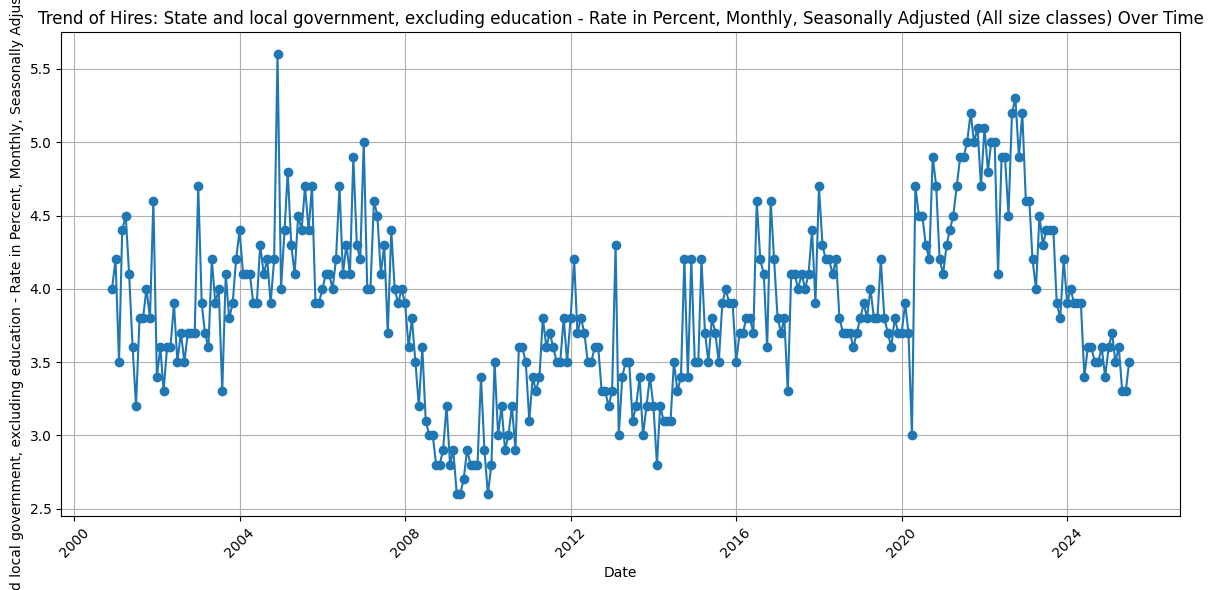

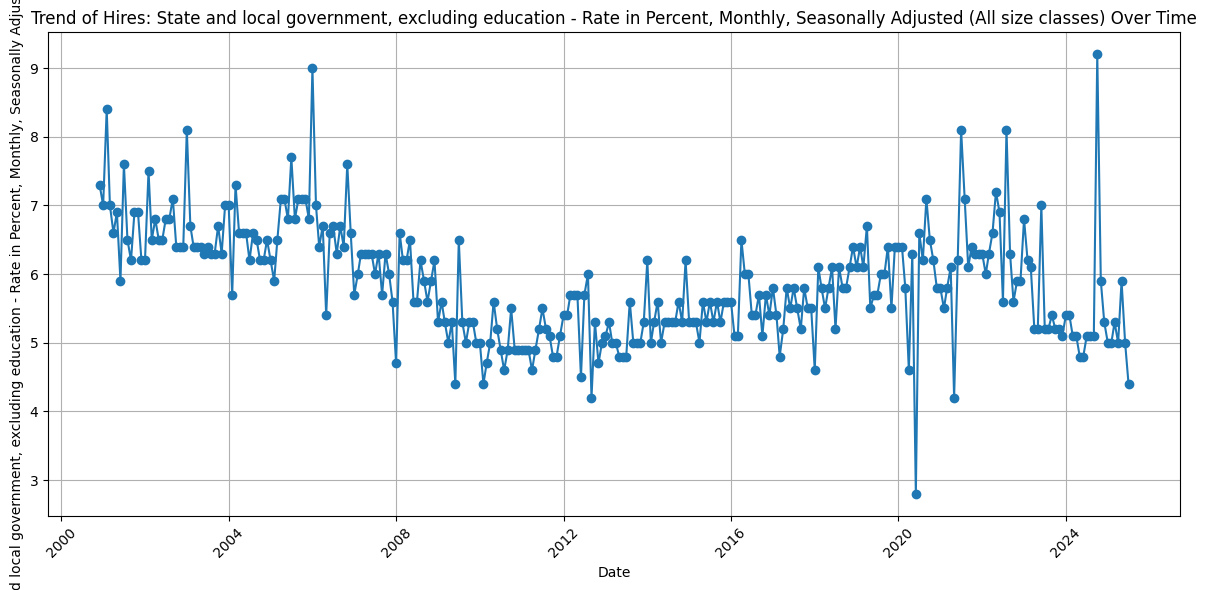

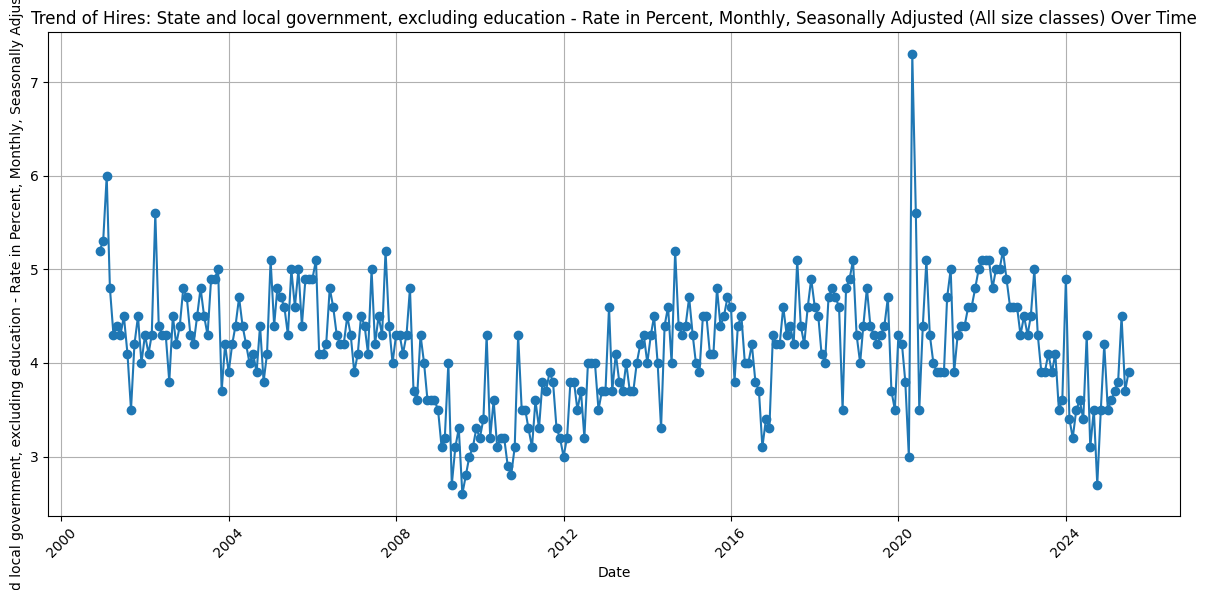

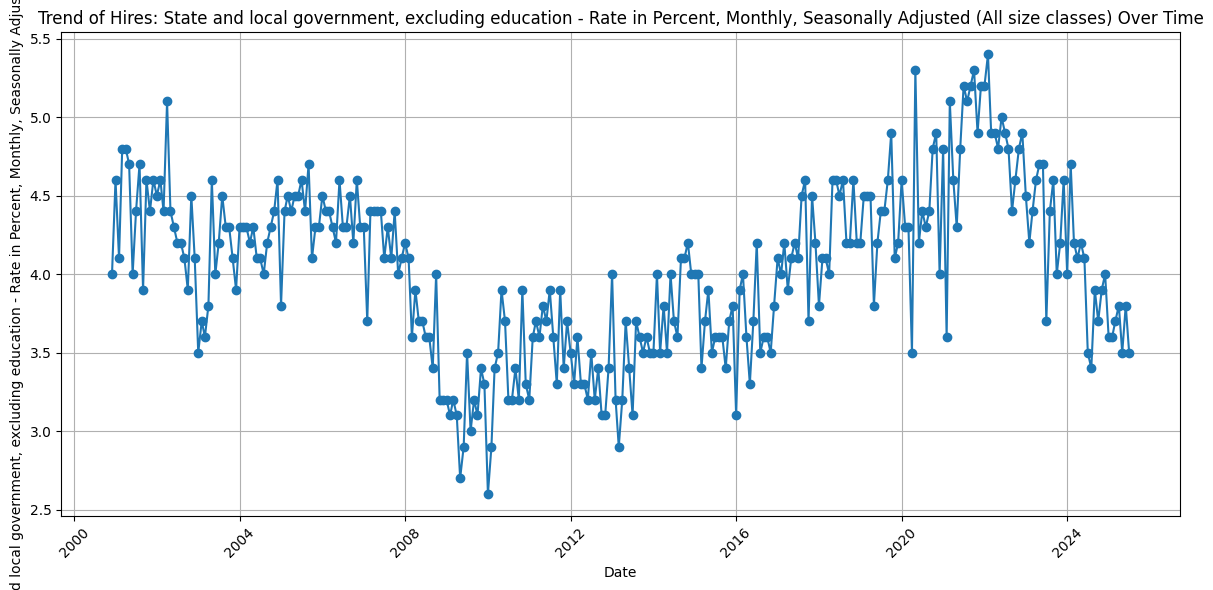

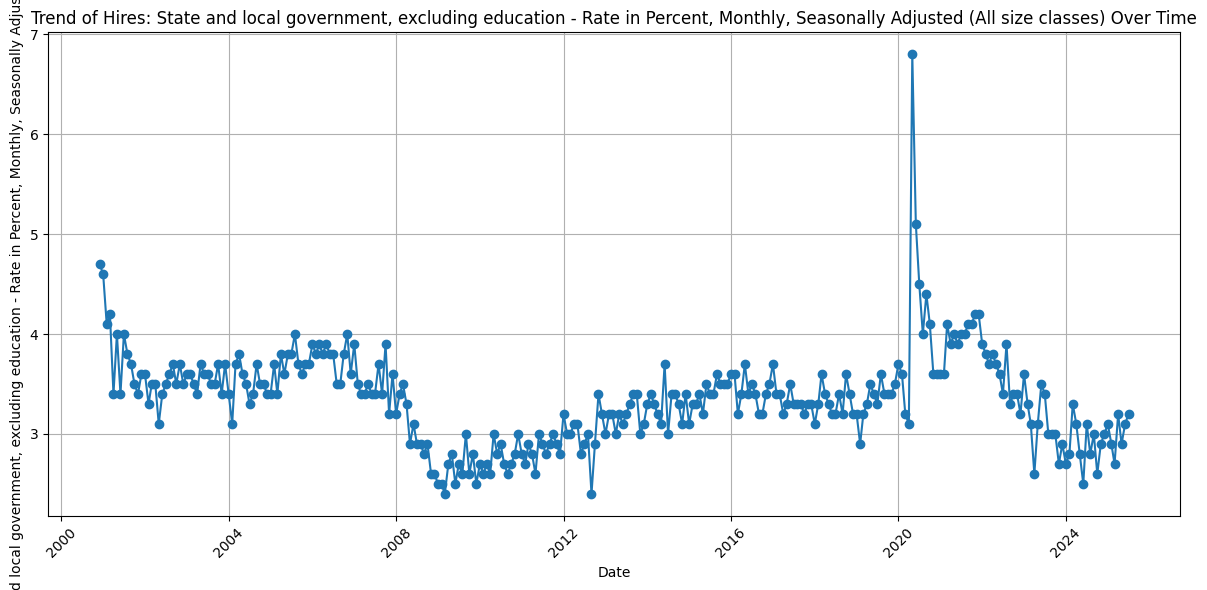

In [94]:
state_nonfarm = [col for col in percent_columns_by_element['Hires'] if 'Total nonfarm in' in col]

for i in range(5):
    plt.figure(figsize=(12, 6))
    plt.plot(jolts_percents['date'], jolts_percents[state_nonfarm[i]], marker='o', linestyle='-')
    plt.title(f'Trend of {col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

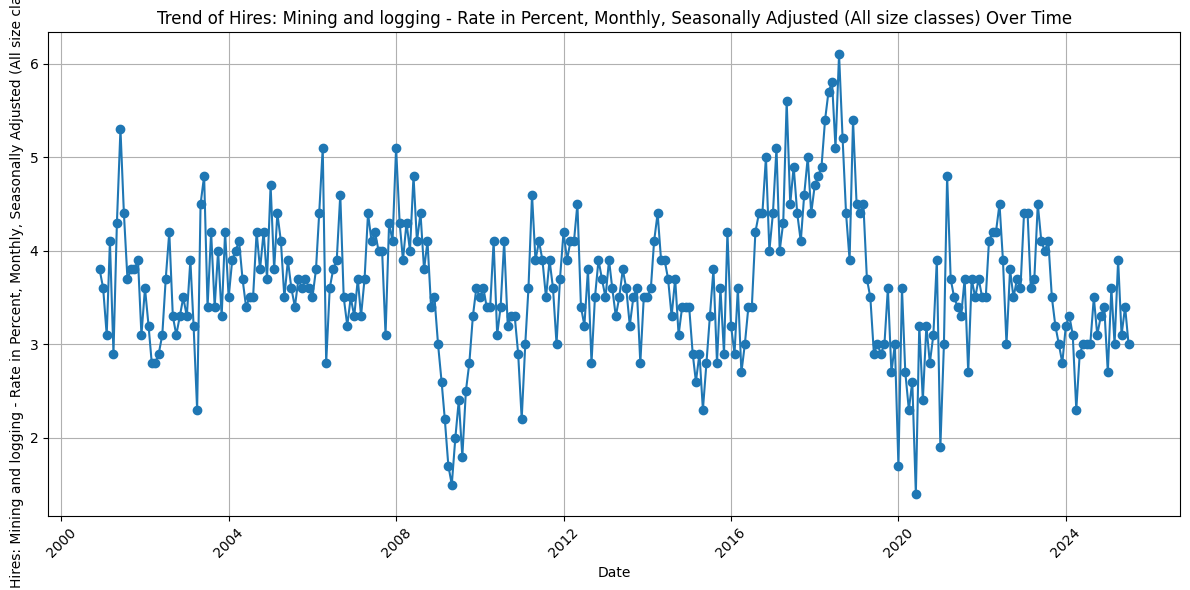

In [95]:
test = [col for col in percent_columns_by_element['Hires'] if 'Hires: Mining and logging' in col]
for col in test:
    plt.figure(figsize=(12, 6))
    plt.plot(jolts_percents['date'], jolts_percents[col], marker='o', linestyle='-')
    plt.title(f'Trend of {col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# NOTE TO SELF:
Seasonally adjusted is good for predicting future data because the data is smoothed, eliminating misleading datapoints.

In [100]:
industries_hires = [col for col in count_columns_by_element['Hires'] if not 'Not Seasonally Adjusted' in col and 'Total' not in col]
industries_hires

['Hires: Mining and logging - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Construction - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Manufacturing - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Durable goods manufacturing - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Nondurable goods manufacturing - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Trade, transportation, and utilities - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Wholesale trade - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Retail trade - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Transportation, warehousing, and utilities - Level in Thousands, Monthly, Seasonally Adjusted (All size classes)',
 'Hires: Information - Level in Thousands, Monthly, Seaso

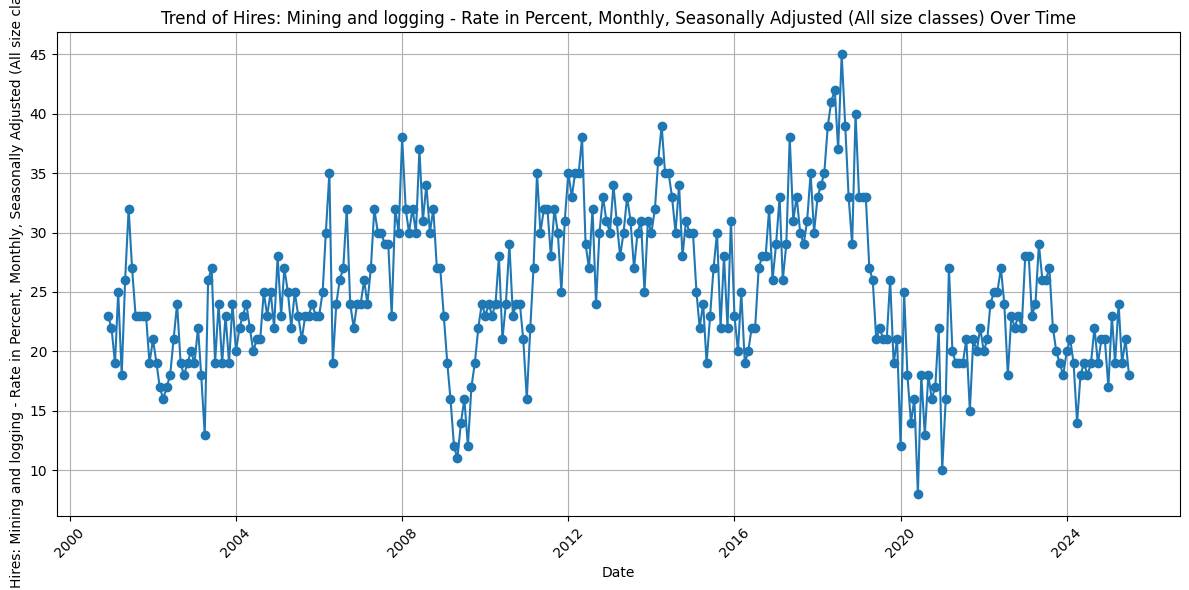

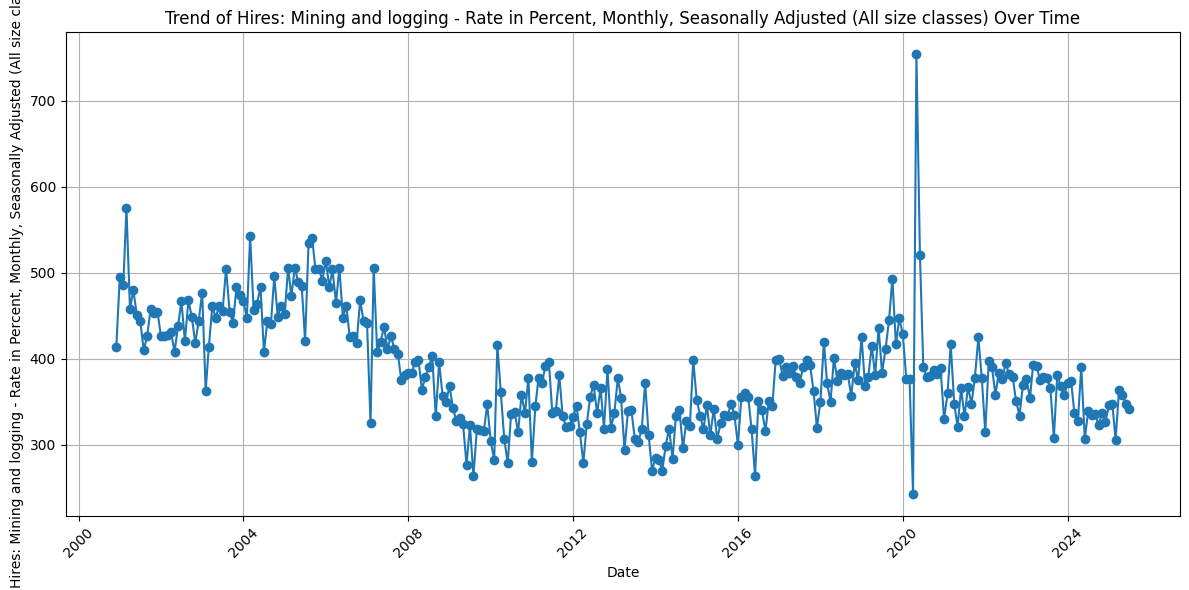

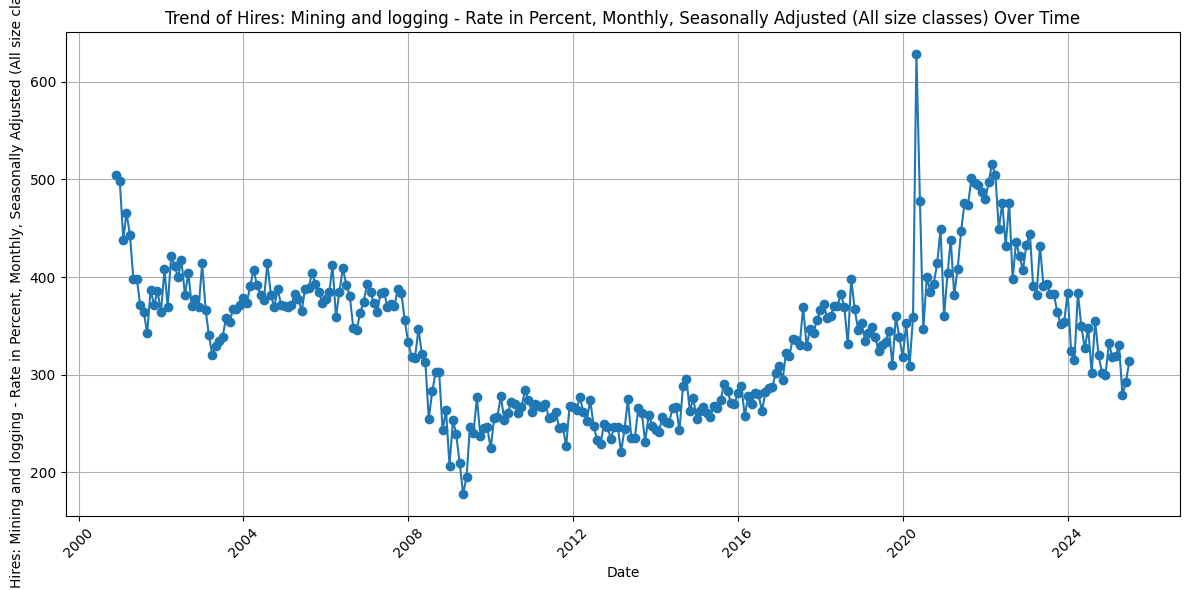

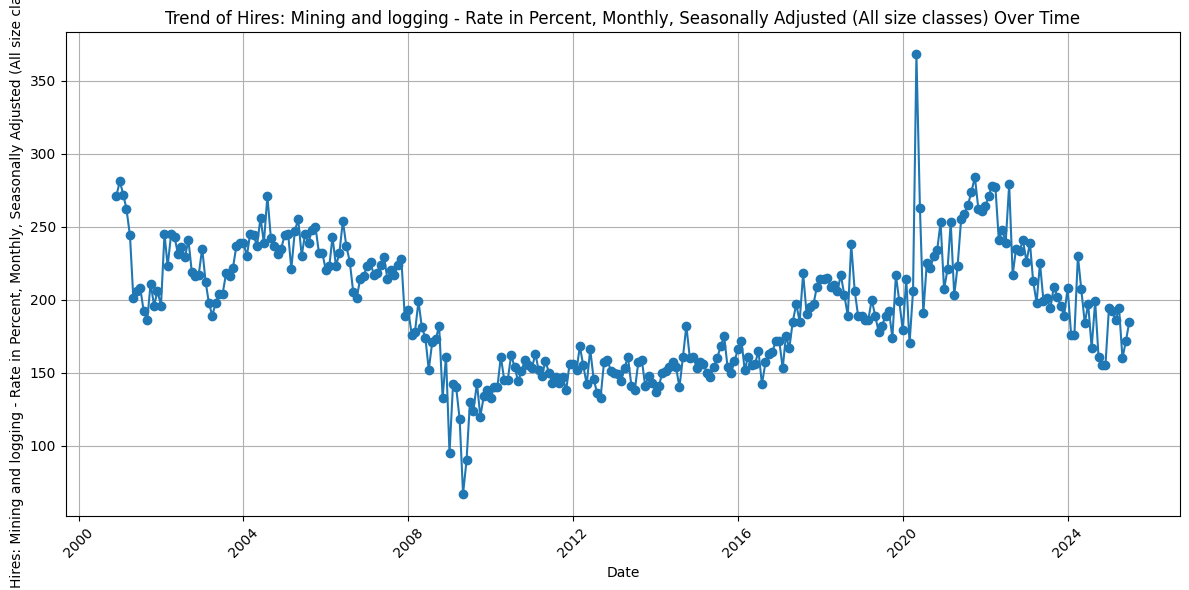

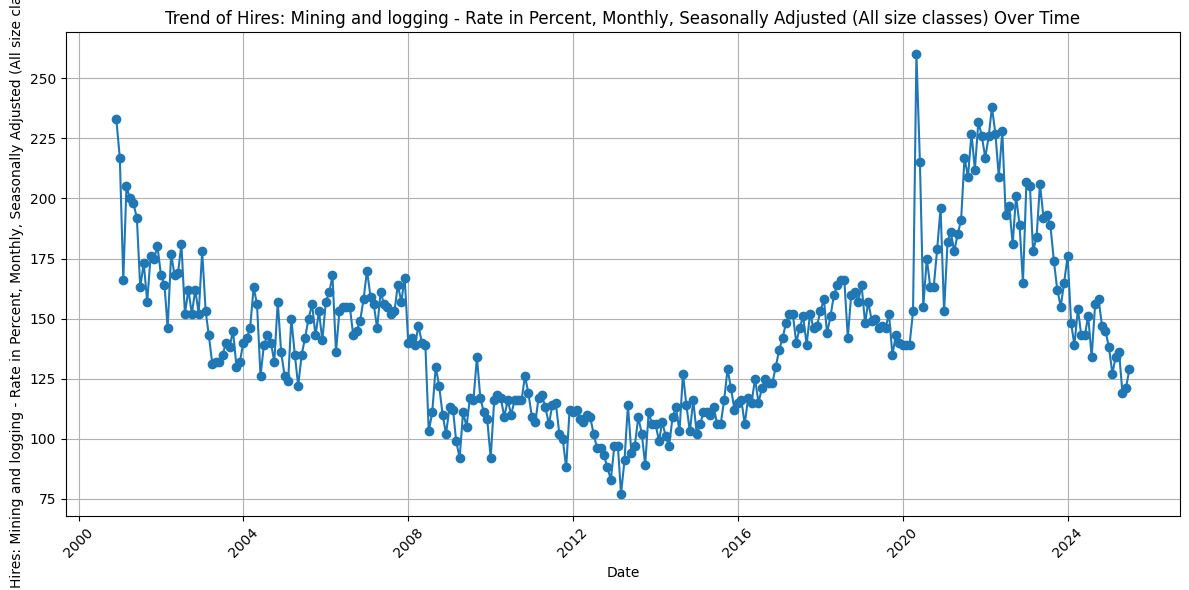

In [101]:
for i in range(5):
    plt.figure(figsize=(12, 6))
    plt.plot(jolts_counts['date'], jolts_counts[industries[i]], marker='o', linestyle='-')
    plt.title(f'Trend of {col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Correlation Heatmap

In [105]:
industries_quits = [col for col in count_columns_by_element['Quits'] if 'Total' not in col]
industries_layoffs = [col for col in count_columns_by_element['Layoffs and Discharges'] if 'Total' not in col]


#### Compare Hiring Rates Across Industries

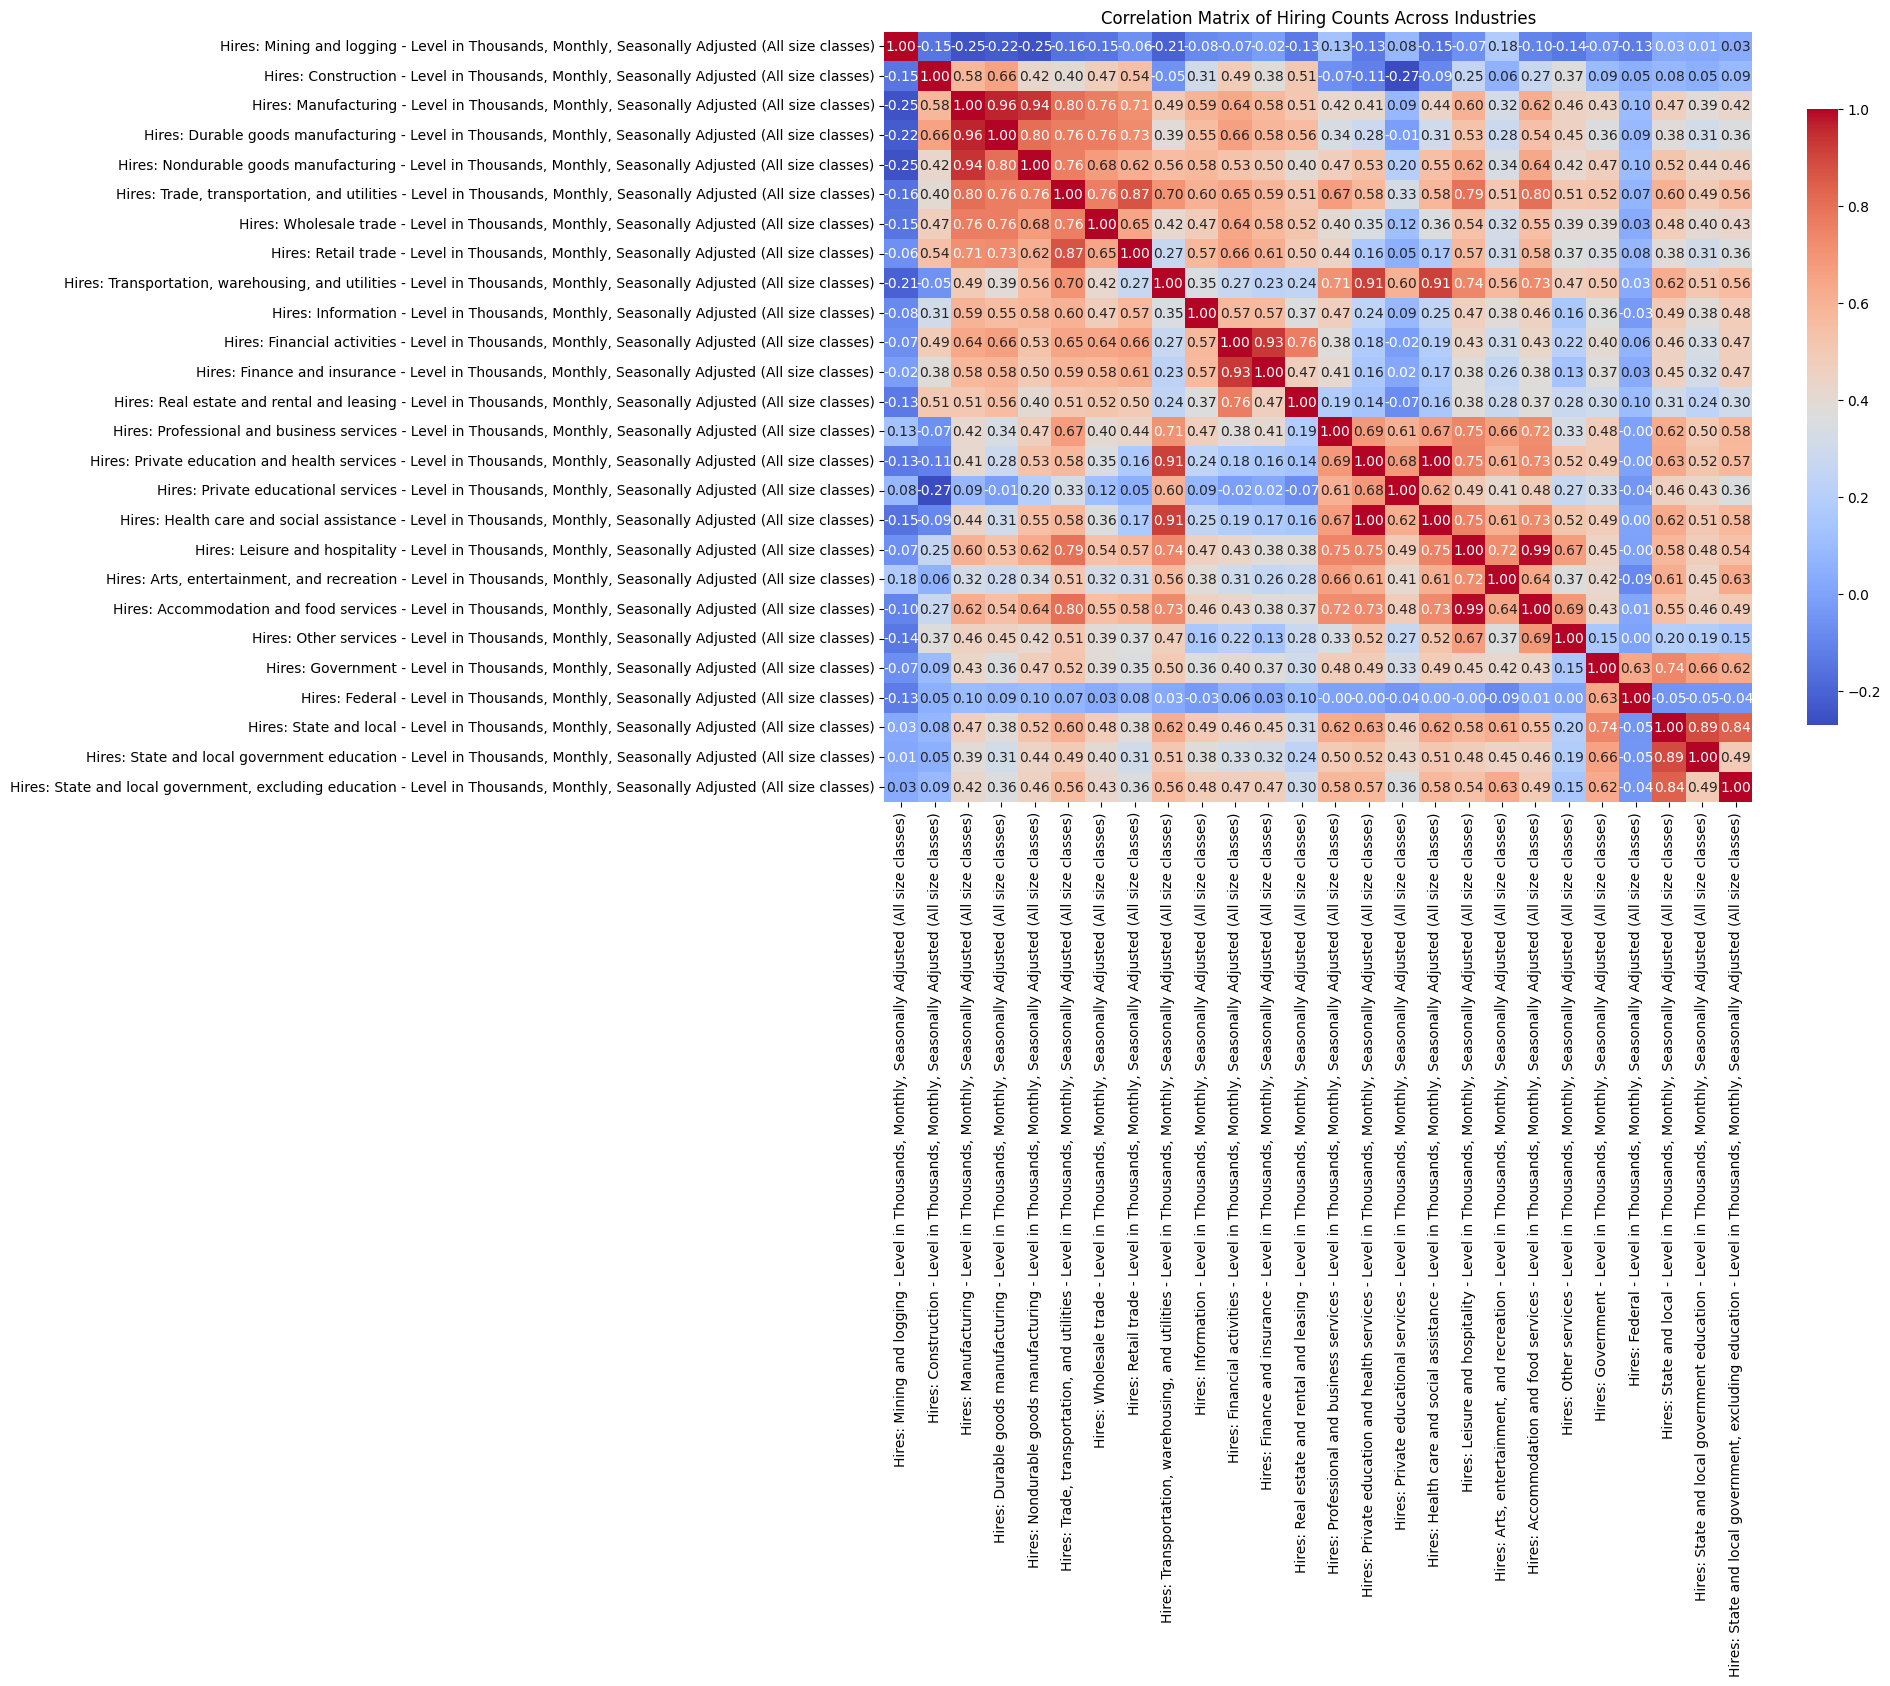

In [106]:
# compare hiring rates across industries

correlation_matrix = jolts_counts[industries_hires].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Hiring Counts Across Industries')
plt.show()

##### Notes:
I think that in this correlation matrix, there is a good amount of multicollinearity which I will end up needing to remove, however we can see some obviously important correlations, such as the negative correlation between private educational services and construction.

### Comparing Quits and Layoffs across industries

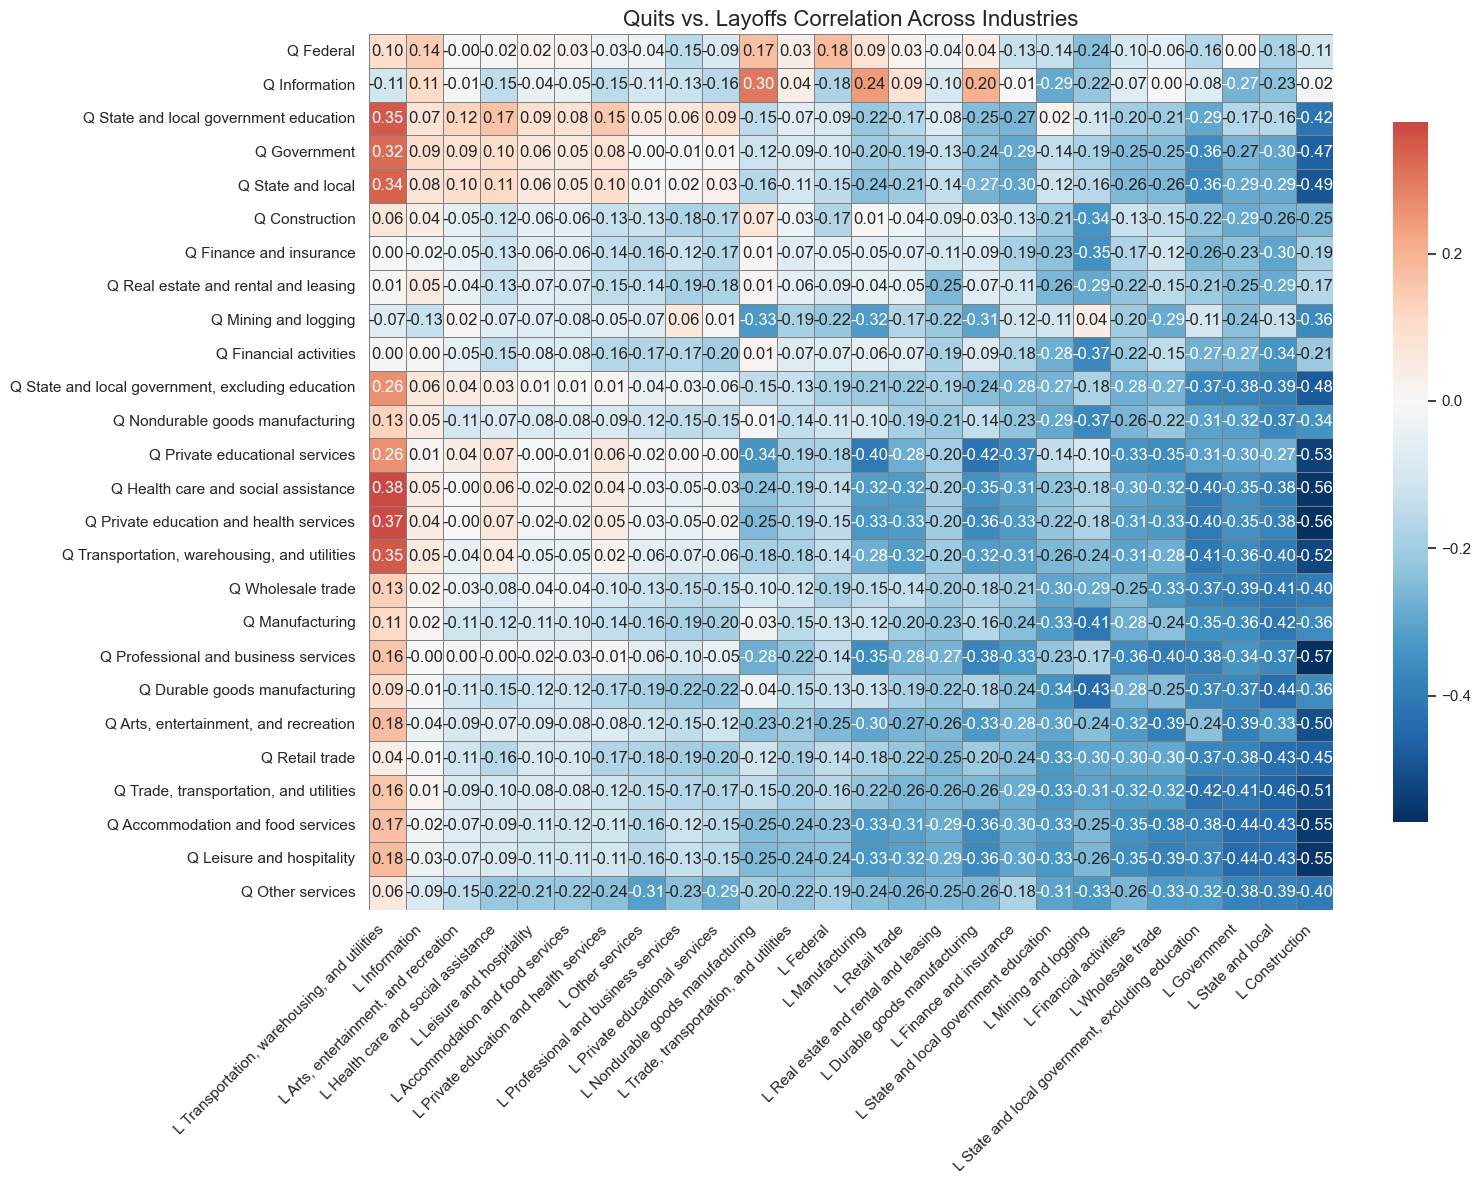

In [112]:
# Step 1: Extract relevant columns
quits_df = jolts_counts[industries_quits]
layoffs_df = jolts_counts[industries_layoffs]

# Step 2: Compute cross-correlation matrix
cross_corr_matrix = pd.DataFrame(index=quits_df.columns, columns=layoffs_df.columns)

for q_col in quits_df.columns:
    for l_col in layoffs_df.columns:
        cross_corr_matrix.loc[q_col, l_col] = quits_df[q_col].corr(layoffs_df[l_col])

# Step 3: Convert to float for plotting
cross_corr_matrix = cross_corr_matrix.astype(float)

# Step 4: Clean labels for readability
def clean_label(label):
    return label.split('-')[0].replace('Quits:', 'Q').replace('Layoffs and Discharges:', 'L').strip()

cross_corr_matrix.columns = [clean_label(col) for col in cross_corr_matrix.columns]
cross_corr_matrix.index = [clean_label(idx) for idx in cross_corr_matrix.index]

# Step 5: Sort rows and columns by average correlation
sorted_index = cross_corr_matrix.mean(axis=1).sort_values(ascending=False).index
sorted_columns = cross_corr_matrix.mean(axis=0).sort_values(ascending=False).index
cross_corr_matrix = cross_corr_matrix.loc[sorted_index, sorted_columns]

# Step 6: Plot the heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))
sns.heatmap(cross_corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', center=0,
            linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
plt.title('Quits vs. Layoffs Correlation Across Industries', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Notes:
This correlation heatmap looks quite nice, and from this one we will definitely be able to gather some good insights from it.